In [4]:
import pandas as pd
iris=pd.read_csv(r'E:\data set\iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
print(iris.isnull().sum())
numeric_columns = iris.select_dtypes(include=['float64', 'int64']).columns
iris[numeric_columns] = iris[numeric_columns].fillna(iris[numeric_columns].mean())


sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler
target_column = 'variety'
X = iris.drop(target_column, axis=1)
y = iris[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


Implement a decision tree classifier
Split the data into training and testing sets, train the decision tree classifier, and evaluate it using a confusion matrix and accuracy score

Accuracy: 1.0


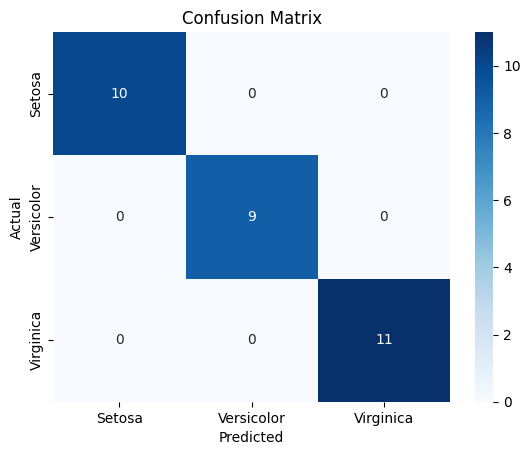

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
